# Minimal Working Examples 

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import ompy as om
import logging
from itertools import product

In [154]:
# Fake a matrix
def mockmatrix(sizex, sizey):
    mat = np.zeros((sizex, sizey))
    for row, col in product(range(sizex), range(sizey)):
       # if col < row+1 and row < 2:
       #     mat[row, col] = sizey-row
        if row in (1, 3) and col < row:
            mat[row, col] = 1
    return mat

## Plotting a matrix and its projections

In [155]:
Ex = range(5)
Eg = range(5)
mat = mockmatrix(len(Ex), len(Eg))
mat = om.Matrix(Ex=Ex, Eg=Eg, values=mat)

<IPython.core.display.Javascript object>


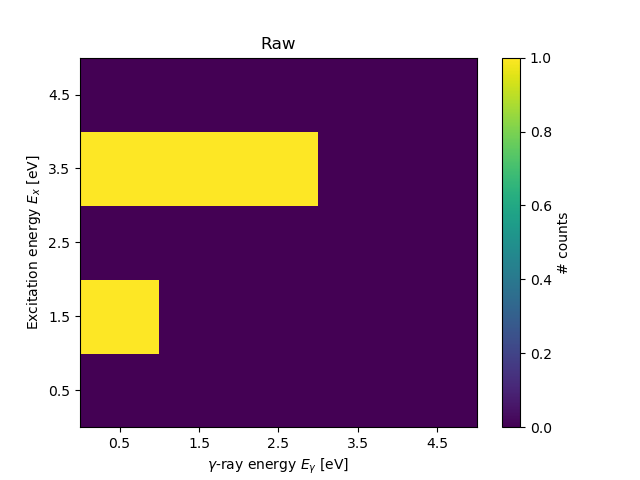

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f95634a78d0>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f95634a78d0>
DEBUG:matplotlib.colorbar:Setting pcolormesh


<IPython.core.display.Javascript object>


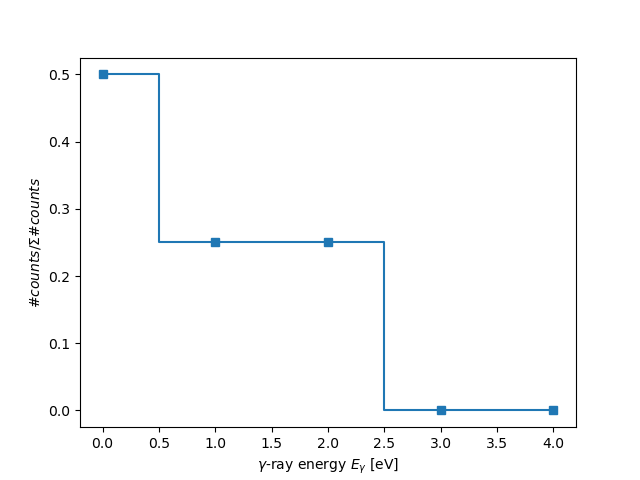

<IPython.core.display.Javascript object>


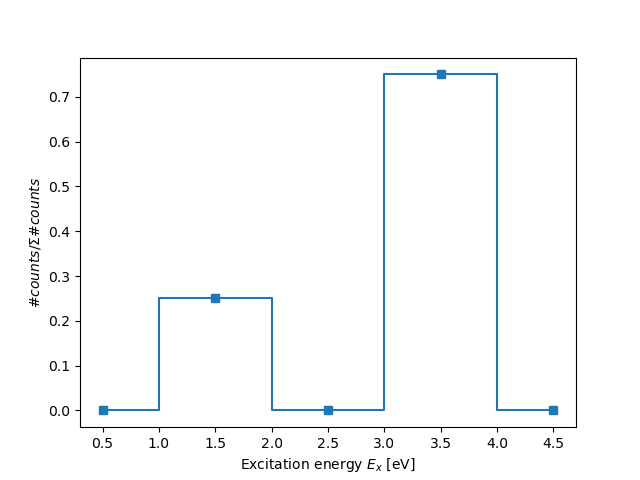

In [158]:
mat.plot(zscale='linear')
mat.plot_projection('Eg', normalize=True, marker='s')
mat.plot_projection('Ex', normalize=True, marker='s')

## Cutting a matrix

  warnings.warn("load() called on non-empty matrix")



<IPython.core.display.Javascript object>


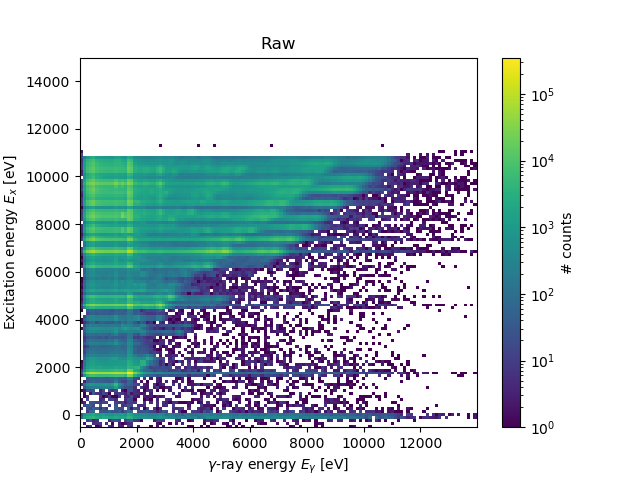

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarLogLocator object at 0x7f9560063908>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarLogLocator object at 0x7f9560063908>
DEBUG:matplotlib.colorbar:Setting pcolormesh


<IPython.core.display.Javascript object>


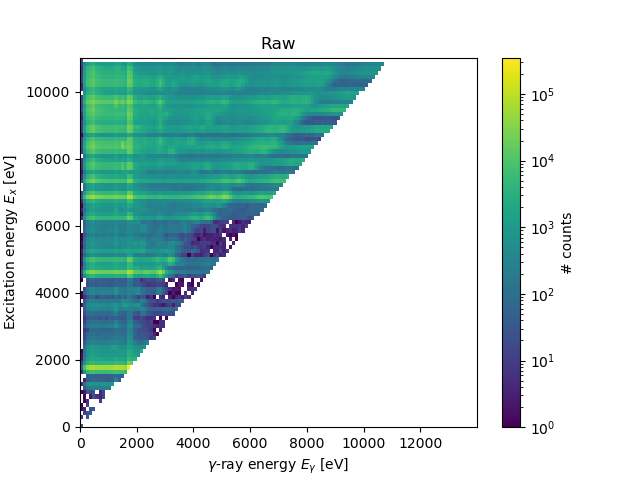

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarLogLocator object at 0x7f9560157518>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarLogLocator object at 0x7f9560157518>
DEBUG:matplotlib.colorbar:Setting pcolormesh


In [184]:
simat = om.load_example_raw('Si28')
simat.plot()
simat.cut('Ex', Emin=0, Emax=11_000)
simba = simat.cut_diagonal(E1=[1,1], E2=[10000, 10000], inplace=False)
simba.plot()

<IPython.core.display.Javascript object>


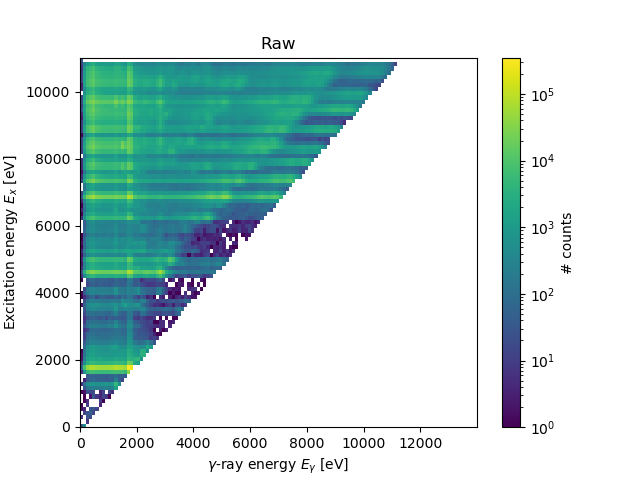

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarLogLocator object at 0x7f955bbe7080>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarLogLocator object at 0x7f955bbe7080>
DEBUG:matplotlib.colorbar:Setting pcolormesh


In [192]:
simat.cut_diagonal()
simat.plot()

## Apply first generation method to a mock matrix 

In [193]:
def mockfirstgen(sizex, sizey):
    m = np.zeros((sizex, sizey))
    for i in range(sizex):
        for j in range(sizey):
            if j <= i:
                m[i, j] = np.random.random()
    return m

<IPython.core.display.Javascript object>


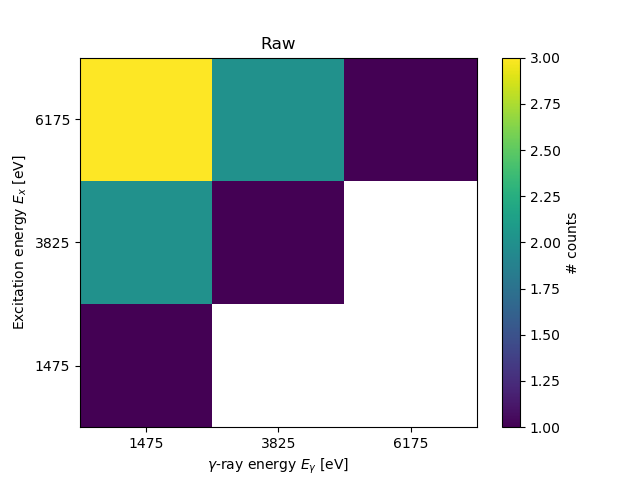

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f955bc61d30>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f955bc61d30>
DEBUG:matplotlib.colorbar:Setting pcolormesh


In [198]:
N = 3
Ex = np.linspace(300, 5e3, N)# + 2350/2
Eg = np.linspace(300, 5e3, N)# + 2350/2
mat = np.array([[1, 0, 0],
               [2, 1, 0],
               [3, 2, 1]], dtype=float)
mat = om.Matrix(Ex=Ex, Eg=Eg, values=mat)#mockfirstgen(N, N))
mat.plot(zscale='linear')

Multiplicities:
Ex = 300.000000, multiplicity(Ex) = 1.000000
Ex = 2650.000000, multiplicity(Ex) = 2.446154
Ex = 5000.000000, multiplicity(Ex) = 2.678571

iteration = 0 max_diff = 0.7534358974358975
iteration = 1 max_diff = 0.03797273325318162
iteration = 2 max_diff = 0.016222177248045755
iteration = 3 max_diff = 0.00700320544739097
iteration = 4 max_diff = 0.003009780194228373


  warnings.warn("Hello from the fill_negative() function. Please debug me.")



<IPython.core.display.Javascript object>


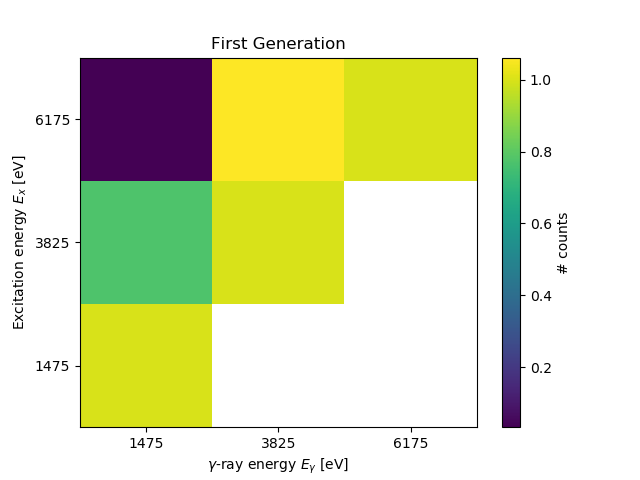

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f955b98eb70>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f955b98eb70>
DEBUG:matplotlib.colorbar:Setting pcolormesh


In [199]:
firstgen = om.first_generation_method(mat, Ex_max=10000, dE_gamma=0.10, verbose=True,
                                      initial_weight_function='box', N_iterations=5,
                                     multiplicity_estimation='total')
firstgen.plot(zscale='linear')

In [119]:
firstgen.values

array([[1.        , 0.        , 0.        ],
       [0.22875817, 1.        , 0.        ],
       [0.        , 1.11977377, 1.        ]])

In [122]:
firstgen.values

array([[1.        , 0.        , 0.        ],
       [0.77358491, 1.        , 0.        ],
       [0.03362331, 1.06102525, 1.        ]])

In [29]:
third = np.array([[2, 0, 0],
                 [1, 1, 0],
                 [2, 1, 1]])
second = np.array([[2, 0, 0],
                  [2, 3, 0],
                  [0, 0, 0]])
first = np.array([[2, 0, 0],
                 [0, 0, 0],
                 [0, 0, 0]])
total = third + second + first
totalm = om.Matrix(Eg=[1, 2, 3], Ex=[1,2,3], values=total)

<IPython.core.display.Javascript object>


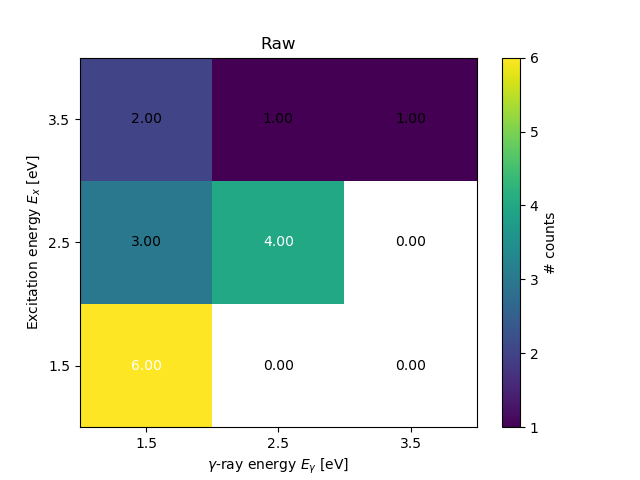

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f955b2c0860>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f955b2c0860>
DEBUG:matplotlib.colorbar:Setting pcolormesh


[Text(1.5, 1.5, '6.00'),
 Text(1.5, 2.5, '3.00'),
 Text(1.5, 3.5, '2.00'),
 Text(2.5, 1.5, '0.00'),
 Text(2.5, 2.5, '4.00'),
 Text(2.5, 3.5, '1.00'),
 Text(3.5, 1.5, '0.00'),
 Text(3.5, 2.5, '0.00'),
 Text(3.5, 3.5, '1.00')]

In [262]:
lines, _, _ = totalm.plot(zscale='linear', cmap='viridis')
annotate_heatmap(lines, totalm)

In [261]:
def heatmap(mat):
    fig, ax = plt.subplots()
    ax.matshow(total, cmap='Greys')
    middle = (mat.max()-mat.min())/2
    for i in range(mat.shape[0]):
        for j in range(mat.shape[1]):
            val = mat[i, j]
            text = ax.text(j, i, val,
                       ha="center", va="center", 
                           color="w" if val > middle else "k")
import matplotlib            
from itertools import product
def annotate_heatmap(im, matrix, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A list or array of two color specifications.  The first is used for
        values below a threshold, the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    #if not isinstance(data, (list, np.ndarray)):
    #    data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(matrix.values.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    dx = matrix.Ex[1] - matrix.Ex[0]
    dg = matrix.Eg[1] - matrix.Eg[0]
    for j, i in product(*map(range, matrix.shape)):
        x = matrix.Eg[i] + dg/2
        y = matrix.Ex[j] + dx/2
        kw.update(color=textcolors[int(im.norm(matrix.values[i, j]) > threshold)])
        text = im.axes.text(y, x, valfmt(matrix.values[i, j], None), **kw)
        texts.append(text)

    return texts

## Applying first generation method

<IPython.core.display.Javascript object>


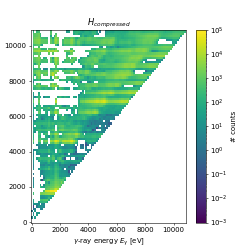

<IPython.core.display.Javascript object>


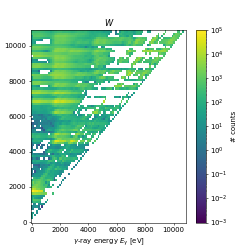

In [59]:
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger("ompy.firstgen")
logger.setLevel(logging.DEBUG)
no_table = lambda record: '┌' in record.GetMessage()
logger.addFilter(no_table) # :(


simat = om.load_example_raw('Si28')
simat.cut('Ex', Emin=0, Emax=11_000)
simat.cut_diagonal()

firstgen = om.FirstGeneration()
firstgen.num_iterations = 3
firstgen.apply(simat)

<IPython.core.display.Javascript object>


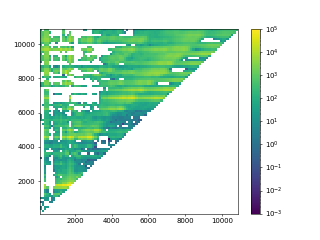

<IPython.core.display.Javascript object>


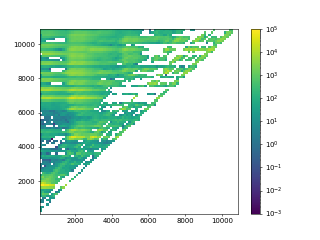

In [60]:
firstgen2 = om.first_generation_method(simat, Ex_max=11_000, dE_gamma=0, multiplicity_estimation='statistical',
                                      N_iterations=3)

In [ ]:
def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A list or array of two color specifications.  The first is used for
        values below a threshold, the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return textsu

<IPython.core.display.Javascript object>


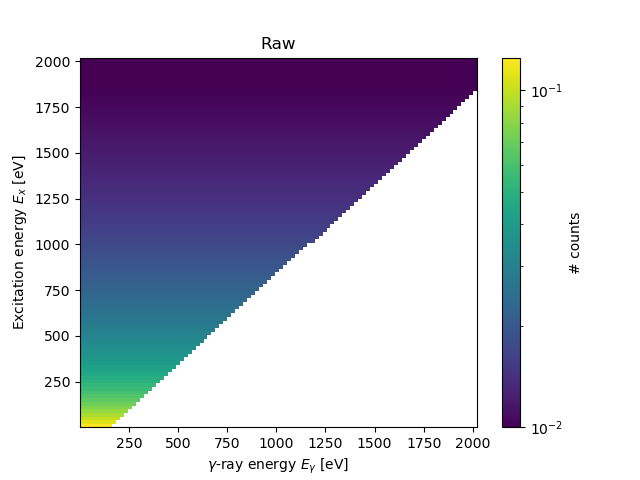

In [65]:
Ex = np.linspace(1, 2000, 100)
Eg = np.linspace(1, 2000, 100)
values = 1/2000*np.ones((100, 100))
mat = om.Matrix(Eg=Eg, Ex=Ex, values=values)
mat.cut_diagonal()
mat.values = mat.values.T
mat.values /= mat.values.sum(axis=0)
mat.values = mat.values.T
mat.plot()

# Rebinning a matrix

<IPython.core.display.Javascript object>


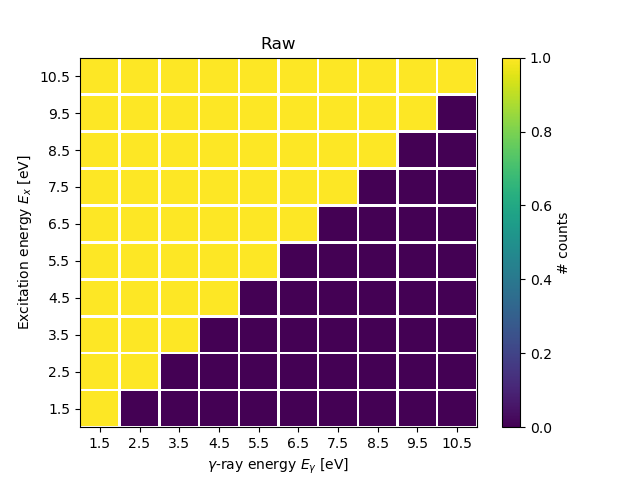

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f95640ee1d0>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f95640ee1d0>
DEBUG:matplotlib.colorbar:Setting pcolormesh


In [151]:
N = 10
#values = np.triu(np.random.randint(0, 10, size=(N, N))).T
values = np.triu(np.ones((N, N))).T
X = np.arange(1, N+1)
#X = np.arange(0, N)
#X = np.array([0.5, 1.5, 2.5, 3.5, 4.5])
mattis = om.Matrix(Ex=X, Eg=X, values=values)
mattis.plot(zscale='linear', edgecolors='white')

DEBUG:ompy.matrix:Rebinning with factor 3, giving 3 edges
DEBUG:ompy.matrix:Old step size: 1
New step size: 3


<IPython.core.display.Javascript object>


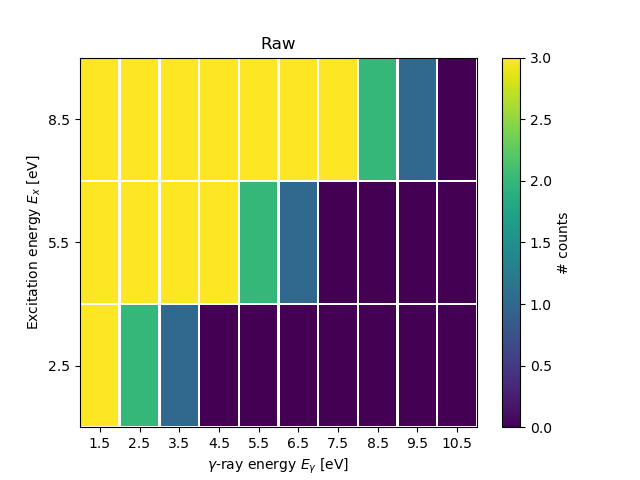

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f956414f518>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f956414f518>
DEBUG:matplotlib.colorbar:Setting pcolormesh
DEBUG:ompy.matrix:Rebinning with factor 3, giving 3 edges
DEBUG:ompy.matrix:Old step size: 1
New step size: 3


<IPython.core.display.Javascript object>


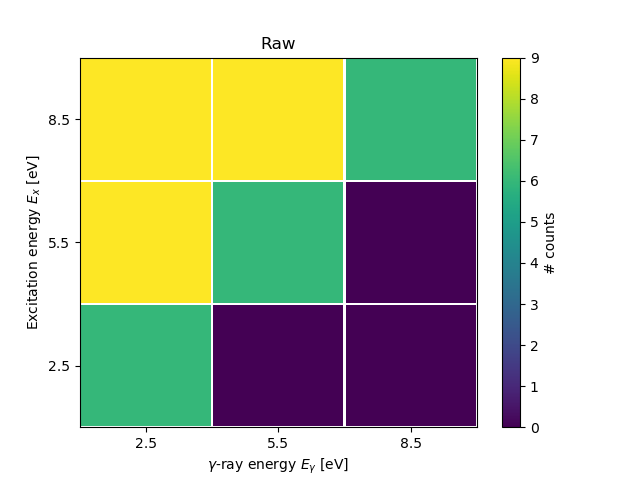

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f95636f8cf8>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f95636f8cf8>
DEBUG:matplotlib.colorbar:Setting pcolormesh


In [152]:
mattis.rebin('Ex', factor=3)
mattis.plot(zscale='linear', edgecolor='white')
mattis.rebin('Eg', factor=3)
mattis.plot(zscale='linear', edgecolor='white')